# Data Visualisation Part 2

### Table of Contents

01. Importing

02. Creating line chart

03. Task: Steps 2-7

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\31622\OneDrive\Documents\Career Foundry\Career Foundry\Exercise\Exercise 4\Instacart Basket Analysis'

#### 01.Importing Data frames

In [3]:
#Importing customers_orders_products.pkl dataframe
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_ords_prods.pkl'))

In [4]:
#checking rows and columns
df_combined.shape

(32434212, 33)

In [5]:
#check dataframe rows and columns
df_combined.head()

,order_id,user_id,number_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last_name,Gender,STATE,Age,date_joined,Num_of_dependants,Marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


**Question 3: Create a histogram of the “order_hour_of_day” column.**

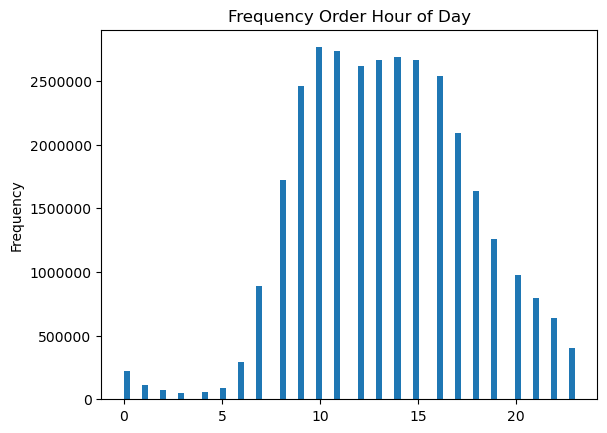

In [6]:
# create histogram for order hour of day
hist_orders_hour_of_day = df_combined['order_hour_of_day'].plot.hist(bins = 75)
plt.title('Frequency Order Hour of Day')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

**Our histogram shows that customers are ordering during the peak hours of between 9AM to 5 PM. After 5 pm, prders begin to slow steadily until about midnight where it slows down and picks up again from 6 am.** 

**Question 4: Create a bar chart from the “loyalty_flag” column.**

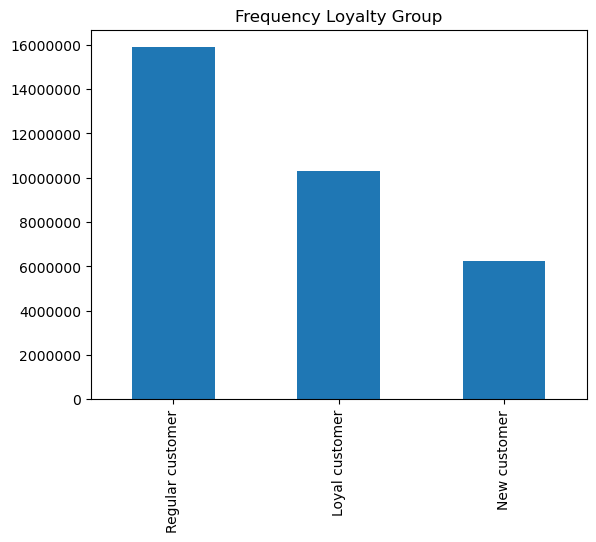

In [7]:
# create barchart for loyalty customer groupings
bar_loyalty_flag = df_combined['loyalty_flag'].value_counts().plot.bar()
plt.title('Frequency Loyalty Group')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

**Observations: Regular customers make up the majority of customers are Instacart**

In [8]:
# create a subset for making a line chart for prices and order hour of day
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [9]:
dev

array([False,  True, False, ..., False,  True,  True])

In [10]:
#store 70% of the sample in the dateframe big
big = df_combined[dev]

In [11]:
#store 30% of the sample in the dateframe big
small = df_combined[~dev]

In [12]:
#checking the count of the whole DF
len(df_combined)

32434212

In [13]:
# checking that the big and small data set = the same number 
len(big) + len(small)

32434212

In [14]:
#creating a dataframe for sample of our two columns
df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Prices By Order Hour of Day')

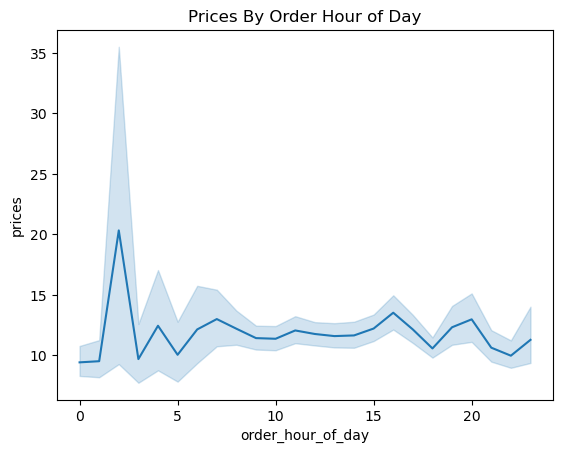

In [15]:
#create line chart of our 2 columns
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Prices By Order Hour of Day')

**Observations: There is not much that can be said for this analysis, except that the more expensive products seems to be purchased early in the morning (2am - 3am)**

**Question 6: Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents**

In [16]:
df_combined['Marital_status'].value_counts(dropna = False)

married                             22776913
single                               5330769
divorced/widowed                     2774428
living with parents and siblings     1552102
Name: Marital_status, dtype: int64

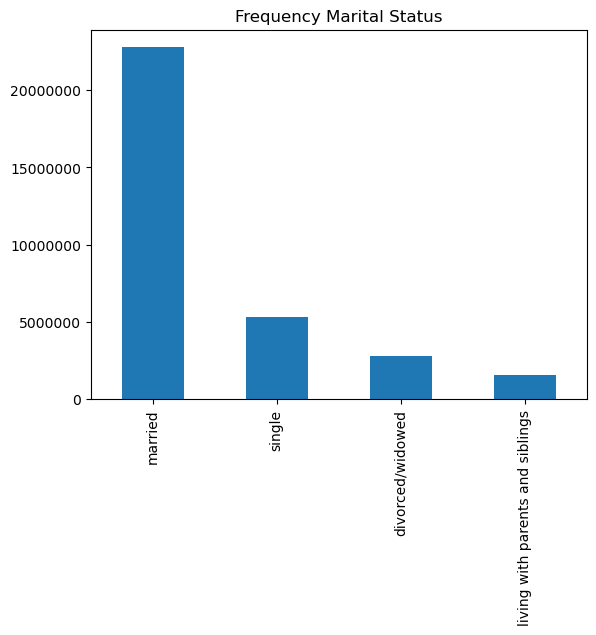

In [17]:
#create bar chart for marital status
bar_marital = df_combined['Marital_status'].value_counts().plot.bar()
plt.title('Frequency Marital Status')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

**Observations: Married people make up majority of Istacart customer base**

In [18]:
#making a new df with just 2 columns in the small subset
df_3 = small[['Num_of_dependants','Age']]

Text(0.5, 1.0, 'Frequency Number of Dependents by Age')

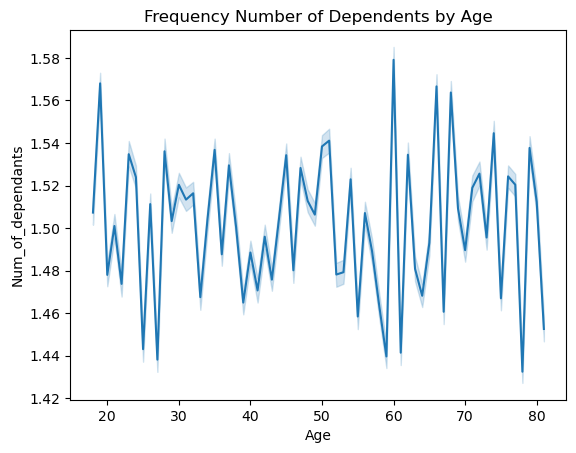

In [19]:
#create line chart of our 2 columns
line_age_dependants = sns.lineplot(data = df_3, x = 'Age',y = 'Num_of_dependants')
plt.title('Frequency Number of Dependents by Age')

**Observations: There is no insights to be gleaned from this analysis**

**Question 7: Create a scatterplot of age and spending power, using the sns.scatterplot() function.**

Text(0.5, 1.0, 'Frequency Income by Age')

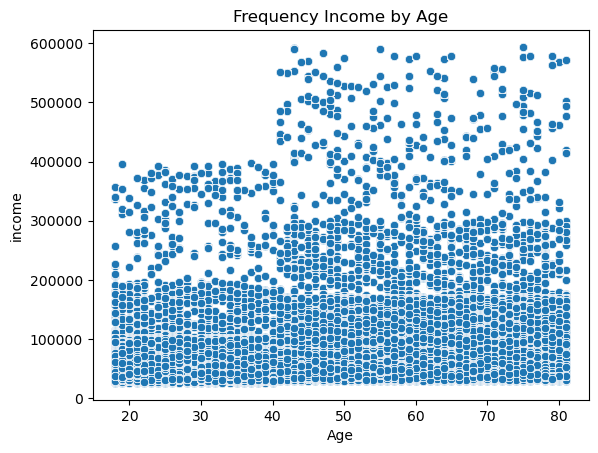

In [20]:
# create a scatterplot of age and income 
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_combined)
plt.title('Frequency Income by Age')

**Observations: Scatterplot shows that people over the age of 40 have a higher income than than of the population aged < 40**

**Question 8: Export your visualizations as “.png” files in your relevant project folder**

In [21]:
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [22]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [23]:
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

In [24]:
bar_marital.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital.png'))

In [25]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [26]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))